In [1]:
# # Importing the necessary modules
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import multivariate_normal
# from landmark import *
# from utils import *
# # from tensorflow.python.ops.numpy_ops import np_config

# # Initializing the random seed
# random_seed=100

# # generate some data
# N = 100

# cov_x = np.array([[1, 0.8], [0.8, 1]])
# cov_y = np.array([[1, 0], [0, 1]])

# mean_x = np.array([3.5,0])
# mean_y = np.array([0,0])

# distr_x = multivariate_normal(cov = cov_x, mean = mean_x, seed = random_seed)
# distr_y = multivariate_normal(cov = cov_y, mean = mean_y, seed = random_seed)

# X = distr_x.rvs(size = N)
# Y = distr_y.rvs(size = N)

# # Plotting the generated samples
# # plt.style.use('seaborn-dark')
# plt.rcParams['figure.figsize']=10,3

# plt.subplot(1,3,1)
# plt.plot(X[:,0],X[:,1], 'o', c='lime',markeredgewidth = 0.5,markeredgecolor = 'black')
# plt.title('X')
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.axis('equal')

# plt.subplot(1,3,2)
# plt.plot(Y[:,0],Y[:,1], 'o', c='red',markeredgewidth = 0.5,markeredgecolor = 'black')
# plt.title('Y')
# plt.xlabel('y1')
# plt.ylabel('y2')
# plt.axis('equal')

# plt.subplot(1,3,3)
# Z = np.concatenate((X,Y), axis=0)
# plt.scatter(Z[0:N,0],Z[0:N,1], c='lime',label= 'X')
# plt.scatter(Z[N+1:,0],Z[N+1:,1], c='red',label = 'Y')
# # plt.title('X,Y')
# plt.axis('equal')

# plt.legend()
# plt.show()


In [1]:
import numpy as np
import random
from scipy.stats import multivariate_normal
from scipy import sparse
# from sklearn import metrics


def gen_toy_data(N_size=100, random_seed=100):

    # Initializing the random seed
    # if random_seed is None:
    #     random_seed = None
    # else:
    #     random_seed = random_seed
    # generate some data
    cov_x = np.array([[1, 0.8], [0.8, 1]])
    cov_y = np.array([[1, 0], [0, 1]])

    mean_x = np.array([0,0])
    mean_y = np.array([5.5,0])

    distr_x = multivariate_normal(cov = cov_x, mean = mean_x, seed = random_seed)
    distr_y = multivariate_normal(cov = cov_y, mean = mean_y, seed = random_seed)

    X = distr_x.rvs(size = N_size)
    Y = distr_y.rvs(size = N_size)
    
    return X, Y


def gen_toy_data_circle(N_size = 100, random_seed=50):

    ###### data generation obtained from an unknown source
    random.seed(random_seed)
    n = N_size
    m = N_size
    bruit = 1/10
    center = [random.random()*(2-1)*3,random.random()*(2-1)*3]
    radius = random.random()
    deformation = 2
    X = np.array([
        [np.cos(i*2*np.pi/n)*radius*deformation for i in range(n)], 
        [np.sin(i*2*np.pi/n)*radius for i in range(n)]]).T

    Y = np.array([
        # type 2pi for complete circle
        [np.cos(i*3*np.pi/m)*radius*(1+random.random()*bruit)+center[0] for i in range(m)], 
        [np.sin(i*1*np.pi/m)*radius*deformation*(1+random.random()*bruit)+center[1] for i in range(m)]]).T
    return X, Y


def gaussian_kernel(X, kernel_size=None):  
    
    # X = (n_size * 2, d)
    # Assume Gaussian kernel
    def rbf2(D2, kernel_size):
       return np.exp(-D2 / (2 * kernel_size ** 2))
   
    n, _ = X.shape  # [n,d] = size(X);
    # kernel_size = np.logspace(-4,4,30) # %kernel_size = logspace(-4,4,30);
    # D2 = max(0,  -2*(X*X.') + sum(X.^2,2) + sum(X.^2,2).'); # % Rely on squared Euclidean distances
    
    D2 = np.maximum(0, -2 * (X @ X.T) 
                    + np.sum(X**2, axis=1, keepdims=True) 
                    + (np.sum(X**2, axis=1, keepdims=True)).T) # n_size * 2, n_size * 2
    
    # find the median kernel size
    if kernel_size is None:
        kernel_size = np.nanmedian(np.ravel(np.sqrt(D2) + sparse.spdiags(np.nan, 0, n, n)))
        #kernel_size = median(reshape(sqrt(D2) + sparse(1:n,1:n,nan,n,n),[],1), 'omitnan');

    

    if  isinstance(kernel_size, float): #kernel_size.size == 1:
        K = rbf2(D2, kernel_size) # n_size * 2, n_size * 2  
    elif isinstance(kernel_size, int):
        K = rbf2(D2, kernel_size) # n_size * 2, n_size * 2
    else:
        # X = X * sparse.spdiags(kernel_size, 0, d, d)
        # # Rely on squared Euclidean distances
        # D2 = np.maximum(np.zeros((n, n)), -2 * (X * np.transpose(X)) + np.sum(np.square(X), axis=1) + np.transpose(
        #     np.sum(np.square(X), axis=1)))
        # K = rbf2(D2, 1)
        # K = np.exp(-D2 / (2 * kernel_size ** 2))
        pass

    K = (K + np.transpose(K)) / 2 # n_size * 2, n_size * 2
    return K, kernel_size


In [3]:
# Z = np.concatenate((X,Y), axis=0)

# m = X.shape[0] #5000
# n = Y.shape[0]
# x_idx = np.array(range(m+n)) < m 

# _, sigmas, div, _ = gauss_rff_select_lmskb(X, Y, p = m+n-1)
# sigma = sigmas[np.argmax(div)]

# sigma = sigma/10
# K, sigma = gaussian_kernel(Z, sigma) 

# if np.min(np.linalg.eigh(K)[0]) < 0:
#     eps = -np.min(np.linalg.eigh(K)[0]) + 1e-5
#     K = K + eps*np.identity(len(K)) 
# # K = K + np.eye(n+m)*1e-5                    
# # if np.min(np.linalg.eigh(K)[0]) < 0:
# #     eps = -np.min(np.linalg.eigh(K)[0]) + 1e-9
# #     K = K + eps*np.identity(len(K)) 

# (_, D, _, _) = LMSKW(K, x_idx, tests = 0)

# # print('K:', K.shape)
# # print('pval:',p_val)
# # print('L', D.shape)
# # print('V:', V.shape)
# # print('alphas:', alphas.shape)

# relationship between witness function eval of MMD and dist of landmark MLW

/Users/yuksel/anaconda3/envs/cvxpy_env/lib/python3.11/site-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


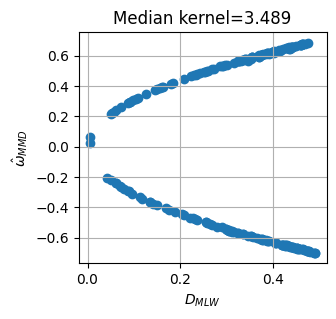

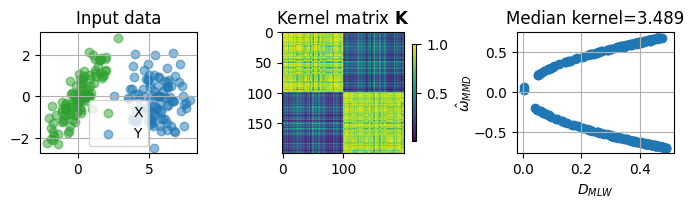

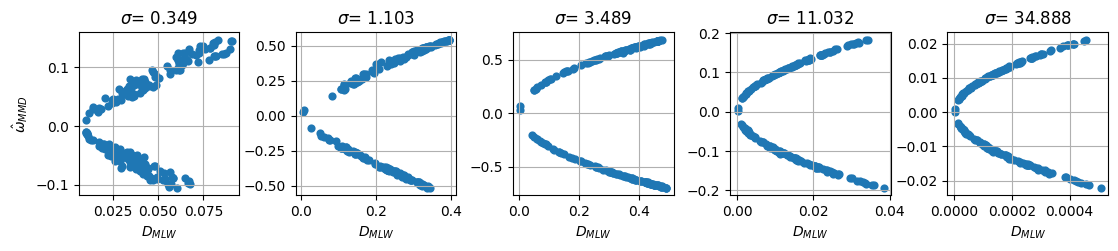

In [2]:

import numpy as np
from scipy.stats import entropy
from landmark import *
import matplotlib.pyplot as plt 

N = 100
random_seed = 100
X, Y = gen_toy_data(N, random_seed)

m = X.shape[0] #5000
n = Y.shape[0]
Z = np.concatenate((X,Y), axis=0)
x_idx = np.array(range(m+n)) < m 
alphas_mmd = 1/m*x_idx - 1/n*(~x_idx)

# get sigma, construct the kernel matrix and obtain dist of landmarks
# _, sigmas, div, _ = gauss_rff_select_lmskb(X, Y, p = m+n-1)
# sigma = sigmas[np.argmax(div)]
# sigma = sigma/10
K, sigma = gaussian_kernel(Z) 
if np.min(np.linalg.eigh(K)[0]) < 0:
    eps = -np.min(np.linalg.eigh(K)[0]) + 1e-9
    K = K + eps*np.identity(len(K)) 
(_, D_mlw, V_mlw, _) = LMSKW(K, x_idx, tests = 0)
V_mmd = K@alphas_mmd
div_mmd = alphas_mmd.T@(K@alphas_mmd)
# d = np.copy(D[:, np.newaxis])

plt.rcParams['figure.figsize']=3.2,3
fig, axs = plt.subplots(1,1)
# fig.subplots_adjust(top=0.9)
# fig.tight_layout(pad=1.0)
axs.scatter(D_mlw,V_mmd, color='tab:blue', marker='o',linewidth=2, s=25)
axs.set(xlabel='$D_{MLW}$', ylabel='$\hat{\omega}_{MMD}$',title='Median kernel=%s'%np.round(sigma,3))
axs.grid()
plt.show()
# plt.savefig('Figures/mmd_witness_MLW.pdf', bbox_inches='tight') 

# second figure
plt.rcParams['figure.figsize']=7.5,2.2
fig, axs = plt.subplots(1,3)
fig.subplots_adjust(top=1.2)
fig.tight_layout(pad=2.5)
axs[0].scatter(Z[0:N,0],Z[0:N,1], c='tab:green',label = 'X', marker='.',alpha = 0.5,s=150)
axs[0].scatter(Z[N+1:,0],Z[N+1:,1], c='tab:blue',label = 'Y', marker='.',alpha = 0.5,s=150)
axs[0].set(xlabel='', ylabel='',title='Input data')
axs[0].grid()
axs[0].legend()
imk = axs[1].imshow(K)
axs[1].set(xlabel='', ylabel='',title='Kernel matrix $\mathbf{K}$')
fig.colorbar(imk, ax=axs[1], location='right', shrink=0.8)
axs[2].scatter(D_mlw,V_mmd, color='tab:blue', marker='o',linewidth=2, s=25)
axs[2].set(xlabel='$D_{MLW}$', ylabel='',title='Median kernel=%s'%np.round(sigma,3))
axs[2].set_ylabel('$\hat{\omega}_{MMD}$', rotation=90, labelpad=0)
axs[2].grid()
# fig.suptitle('Witnees function distribution') # or plt.suptitle('')
# plt.show()
# plt.savefig('Figures/mmd_witness_MLW.pdf', bbox_inches='tight') 


# plot for multiple sigmas
_, sigma = gaussian_kernel(Z) 
sigmas =  np.logspace(-1,1,5)*sigma
fig, axs = plt.subplots(1, len(sigmas), figsize=(11, 2.2), facecolor='w', edgecolor='k')
axs = axs.ravel()
fig.subplots_adjust(top=0.8)
fig.tight_layout(pad=1.0)
for i,sigma in enumerate(sigmas):
        
    K, _ = gaussian_kernel(Z,sigma) 
    if np.min(np.linalg.eigh(K)[0]) < 0:
        eps = -np.min(np.linalg.eigh(K)[0]) + 1e-9
        K = K + eps*np.identity(len(K)) 
    (_, D_mlw, _, _) = LMSKW(K, x_idx, tests = 0)
    V_mmd = K@alphas_mmd
    div_mmd = alphas_mmd.T@(K@alphas_mmd)
    
    axs[i].scatter(D_mlw,V_mmd, color='tab:blue', marker='o',linewidth=2, s=15)
    axs[i].set(xlabel='$D_{MLW}$', ylabel='',title=str('$\sigma$= %s'%np.round(sigmas[i],3)))
    axs[i].grid()
axs[0].set(ylabel='$\hat{\omega}_{MMD}$')
plt.show()
# fig.suptitle('Energy-Based Distributional Landmark vs $\u03B2$') # or plt.suptitle('')

